In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from ema_workbench.analysis import prim
from Utils import prim_dens
from sklearn.model_selection import train_test_split
import pandas as pd
import gzip
import random
from sklearn.preprocessing import MinMaxScaler

def generate_points(n, m):
    # Generate n x m matrix of random points in [0, 1]
    x = np.random.rand(n, m)
    
    # Generate a vector of n random labels (0 or 1)
    y = np.random.choice([0, 1], n, replace=True)
    
    # Return as a dictionary
    return x, y


In [3]:
def calculate_precision_test_data(lims, x_test, y_test):

    is_within_limits = True
    
    # Iterate over each row of temp_data
    # Initialize TP, FP, TN, FN counters
    tp = 0
    fp = 0
    tn = 0
    fn = 0


    # Assuming x_test is a 2D NumPy array and y_test is a 1D NumPy array
    for row_index in range(x_test.shape[0]):
        for col_index in range(x_test.shape[1]):
            element = x_test[row_index, col_index]

            # Check if the element is within the limits for the current column
            is_within_limits = (lims.iloc[0, col_index] <= element <= lims.iloc[1, col_index]) and is_within_limits # Calculate column index
            
        if is_within_limits & (y_test[row_index] == 1):
            tp = tp + 1
        if is_within_limits & (y_test[row_index] == 0):
            fp = fp + 1
        if is_within_limits & (y_test[row_index] == 0):
            tn = tn + 1
        if is_within_limits & (y_test[row_index] == 1):
            fn = fn + 1
        is_within_limits = True
            
                
    if (tp == 0):
        return 0
    else:
        return tp/(tp + fp)

experiment 32/32

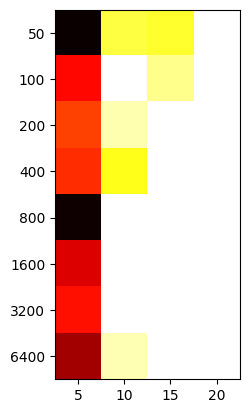

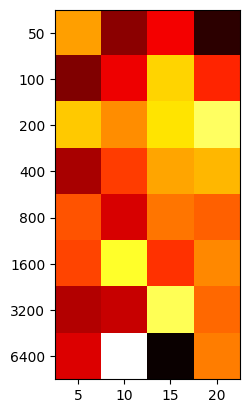

In [4]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 20]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(5):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            x, y = generate_points(pts[n], atrs[m])
            x_test, y_test = generate_points(pts[n], atrs[m])
            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions)-1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data(box, x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()

plt.imshow(res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()


In [8]:
# Path to the Higgs dataset .zip file
gz_file_path = '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Data/SUSY.csv.gz'

# Open the Gzip-compressed CSV file
with gzip.open(gz_file_path, 'rb') as gz_file:
    # Read the dataset into a DataFrame
    data = pd.read_csv(gz_file)

print(data)

          1.000000000000000000e+00  8.692932128906250000e-01  \
0                              1.0                  0.907542   
1                              1.0                  0.798835   
2                              0.0                  1.344385   
3                              1.0                  1.105009   
4                              0.0                  1.595839   
...                            ...                       ...   
10999994                       1.0                  1.159912   
10999995                       1.0                  0.618388   
10999996                       1.0                  0.700559   
10999997                       0.0                  1.178030   
10999998                       0.0                  0.464477   

          -6.350818276405334473e-01  2.256902605295181274e-01  \
0                          0.329147                  0.359412   
1                          1.470639                 -1.635975   
2                         -0.876626 

In [9]:
columns = ['label', 'lepton  1 pT', 'lepton  1 eta', 'lepton  1 phi', 'lepton  2 pT', 'lepton  2 eta', 'lepton  2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

scaler = MinMaxScaler()
data1 = data
data = scaler.fit_transform(data)
data = pd.DataFrame(data, index = data1.index, columns=columns)

print(data)

          label  lepton  pT  lepton  eta  lepton  phi  \
0           1.0    0.053521       0.5676     0.603005   
1           1.0    0.044328       0.8020     0.030563   
2           0.0    0.090466       0.3200     0.768393   
3           1.0    0.070221       0.5660     0.936646   
4           0.0    0.111732       0.3752     0.501925   
...         ...         ...          ...          ...   
10999994    1.0    0.074865       0.7082     0.531055   
10999995    1.0    0.029067       0.2920     0.818375   
10999996    1.0    0.036016       0.6590     0.936010   
10999997    0.0    0.076397       0.5242     0.133552   
10999998    0.0    0.016050       0.4308     0.565597   

          missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                         0.097277            0.410339  0.097729   0.406135   
1                         0.029457            0.622153  0.098682   0.715905   
2                         0.129367            0.753154  0.168171   0.222741   

experiment 32/32

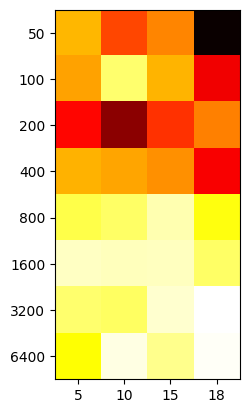

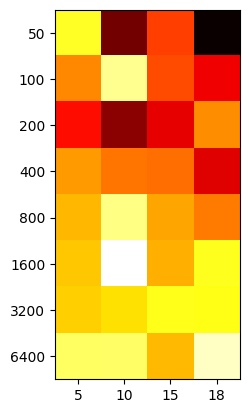

In [10]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 18]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(5):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            
            num_columns_to_select = atrs[m]  # Change this to the number of columns you need
            label_column = None
            
            data_temp = data.copy()
            label_column = data_temp['label']
            data_temp.drop('label', axis=1, inplace=True)

            # Select random columns
            selected_columns = random.sample(list(data_temp.columns), num_columns_to_select)

            # Create a new DataFrame with the selected columns
            data_temp = data_temp[selected_columns]
            data_temp.insert(loc=0, column='label', value=label_column)
            
            #sampeling a subset of the whole data set
            sample_train, sample_test = train_test_split(data_temp, test_size=pts[n], train_size=pts[n]*2, stratify=data_temp['label'])
        
            sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
            sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

            y = sample_train['label'].values
            sample_train.drop('label', axis=1, inplace=True)
            x = sample_train.values
            
            y_test = sample_test['label']
            sample_test.drop('label', axis=1, inplace=True)
            x_test = sample_test.values
            
            prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
            prim_alg.fit()
            precisions = prim_alg.get_precisions()
            if len(precisions) <= 0:
                prec_train.append(0)
            else:
                prec_train.append(precisions[len(precisions)-1])
            boxes = prim_alg.get_boxes()
            if len(boxes) <= 0:
                prec_test.append(0)
            else:
                box = boxes[len(boxes) - 1]
                box = pd.DataFrame(box)
                prec_test.append(calculate_precision_test_data(box, x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()

plt.imshow(res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()